## Aadharsh Pannirselvam and Harris Lencz
## Code for Project
## Note: Captions for Figures are in report document

# Modelling

## Setup / Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
red = pd.read_csv('/content/drive/My Drive/winedata/winequality-red.csv', delimiter=';')
white = pd.read_csv('/content/drive/My Drive/winedata/winequality-white.csv', delimiter=';')
red['color'] = 0
white['color'] = 1
wines = pd.concat([red,white])
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Exploratory Analysis

In [ ]:
wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
dtype: bool

In [ ]:
wines['color'].value_counts()

1    4898
0    1599
Name: color, dtype: int64

In [ ]:
wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


In [ ]:
X1 = wines[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides', \
           'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

# Add a constant to the predictor variables
X1 = sm.add_constant(X1)
vifs = pd.DataFrame()
vifs["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vifs["features"] = X1.columns
vifs

,VIF Factor,features
0,1.699783e+06,const
1,4.896925e+00,fixed acidity
2,1.949413e+00,volatile acidity
3,1.608220e+00,citric acid
4,7.228979e+00,residual sugar
5,1.631958e+00,chlorides
6,2.135481e+00,free sulfur dioxide
7,2.937601e+00,total sulfur dioxide
8,1.591450e+01,density
9,2.536522e+00,pH


In [ ]:
#Just trying out backwards-model selection
#Did not make it into official report
X1 = wines[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides', \
           'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
Y1 = wines['color']

X1 = sm.add_constant(X1) # adding a constant

model1 = sm.Logit(Y1, X1).fit()
predictions = model1.predict(X1) 

model1.summary()

#Backwards Model Selection, Round 1, removing 'pH'
X2 = wines[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides', \
           'free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol']]
Y2 = wines['color']

X2 = sm.add_constant(X2) # adding a constant

model2 = sm.Logit(Y2, X2).fit()
predictions = model2.predict(X2) 

model2.summary()

#Backwards Model Selection, Round 2, removing 'fixed acidity'
X3 = wines[['volatile acidity','citric acid','residual sugar','chlorides', \
           'free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol']]
Y3 = wines['color']

X3 = sm.add_constant(X3) # adding a constant

model3 = sm.Logit(Y3, X3).fit()
predictions = model3.predict(X3) 

model3.summary()

Optimization terminated successfully.
         Current function value: 0.033005
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.033120
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.033211
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  color   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6487
Method:                           MLE   Df Model:                            9
Date:                Wed, 10 May 2023   Pseudo R-squ.:                  0.9405
Time:                        02:08:36   Log-Likelihood:                -215.77
converged:                       True   LL-Null:                       -3625.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1627.5225    119.877     13.577      0.000    1392.567    1862.478
volatile acidity        -6.6052      0.986     -6.697      0.000      -8.538      -4.672
citric acid              2.8746      1.078      2.667      0.008       0.762       4.987
residual sugar           0.8679      0.086     10.073      0.000       0.699       1.037
chlorides              -24.4666      3.818     -6.408      0.000     -31.951     -16.983
free sulfur dioxide     -0.0653      0.013     -4.873      0.000      -0.092      -0.039
total sulfur dioxide     0.0533      0.005     10.838      0.000       0.044       0.063
density              -1618.6541    119.175    -13.582      0.000   -1852.233   -1385.076
sulphates               -3.4131      1.203     -2.836      0.005      -5.772      -1.054
alcohol                 -1.6848      0.226     -7.466      0.000      -2.127      -1.242
========================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
thresholds = np.arange(0,1.05,0.05)
accuracy_values = np.array([])
sensitivity_values = np.array([])
specificity_values = np.array([])

for threshold in thresholds:
  preds = model3.predict(X3)
  c_m = sklearn.metrics.confusion_matrix(Y3, preds > threshold)
  accuracy = (c_m[1][1] + c_m[0][0])/c_m.sum() #(true positives + true negatives)/n
  sensitivity = c_m[1][1]/(c_m[1][1] + c_m[1][0]) #true positives/(true positives + false negatives)
  specificity = c_m[0][0]/(c_m[0][0] + c_m[0][1]) #true negatives/(true negatives + false positives)

  accuracy_values = np.append(accuracy_values, accuracy)
  sensitivity_values = np.append(sensitivity_values, sensitivity)
  specificity_values = np.append(specificity_values, specificity)

dataframe = pd.DataFrame(
    {"Threshold": thresholds,
     "Accuracy": accuracy_values,
     "Sensitivity": sensitivity_values,
     "Specificity": specificity_values})

dataframe

,Threshold,Accuracy,Sensitivity,Specificity
0,0.00,0.753886,1.000000,0.000000
1,0.05,0.977682,0.999592,0.910569
2,0.10,0.986917,0.999388,0.948718
3,0.15,0.989841,0.998775,0.962477
4,0.20,0.991996,0.998571,0.971857
5,0.25,0.993228,0.998571,0.976861
6,0.30,0.993228,0.998367,0.977486
7,0.35,0.993535,0.998163,0.979362
8,0.40,0.994459,0.997550,0.984991
9,0.45,0.994613,0.997142,0.986867


In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(Y3, preds > 0.30)
confusion_matrix

array([[1563,   36],
       [   8, 4890]])

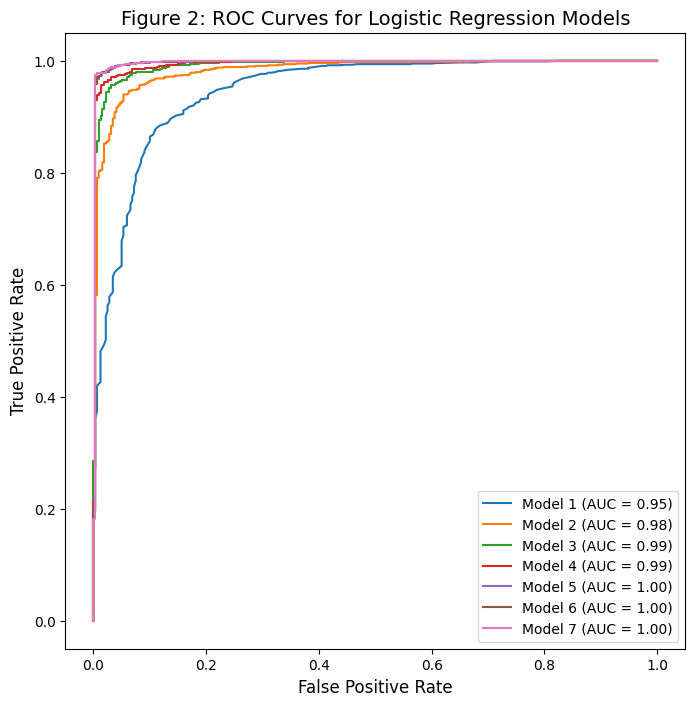

In [ ]:
#Forward-Model Selection featured in official report
#ROC Curve and AUC values which are nice but did not make it into official report
x_train, x_test, y_train, y_test = train_test_split(
    wines.drop("color", axis=1), wines["color"], stratify = wines["color"], test_size=0.2, random_state=33
)
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train_pre)
# x_test = scaler.fit_transform(x_test_pre)

forward_results_df = pd.DataFrame(
    columns=["Features", "Accuracy", "Precision", "Recall", "F1 Score"]
)
pred_list = []
intercept_list=[]
coef_list=[]
fig, ax = plt.subplots(figsize=(8, 8))
for i in np.arange(7):
    lr = LogisticRegression(max_iter=1000) #cv for C?
    sfs = SequentialFeatureSelector(
        lr, n_features_to_select=i + 1, scoring="roc_auc", n_jobs=-1
    )
    # Fit the feature selector on the training data and select the best features
    sfs.fit(x_train, y_train)
    x_train_sfs = sfs.transform(x_train)
    x_test_sfs = sfs.transform(x_test)

    # Train the classifier on the selected features and make predictions on the test data
    lr.fit(x_train_sfs, y_train)
    coef_list.append(lr.coef_)
    intercept_list.append(lr.intercept_)
    y_pred = lr.predict(x_test_sfs)
    pred_list.append(y_pred)

    # Compute the evaluation metrics and store the results in the DataFrame
    forward_results_df.loc[i] = [
        ", ".join(sfs.get_feature_names_out().astype(str)),
        metrics.accuracy_score(y_test, y_pred),
        metrics.precision_score(y_test, y_pred),
        metrics.recall_score(y_test, y_pred),
        metrics.f1_score(y_test, y_pred),
    ]
    display = metrics.RocCurveDisplay.from_estimator(
        lr, X=x_test_sfs, y=y_test, ax=ax, name=f"Model {i+1}"
    )

plt.title("Figure 2: ROC Curves for Logistic Regression Models", fontsize=14)
plt.xlabel('False Positive Rate' ,fontsize=12)
plt.ylabel('True Positive Rate' ,fontsize=12)
plt.savefig("ROC.png", dpi=300) #save to same directory as notebook
plt.show()

In [ ]:
#Figure 1 in official report
#Based on Forward-Model Selection
forward_results_df["Model"] = [
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
]
cols = list(forward_results_df.columns)
cols.insert(0, cols.pop(cols.index("Model")))
forward_results_df = forward_results_df.loc[:, cols].set_index("Model")

prev_features = []
feature_diffs = []

for row in forward_results_df.itertuples():
    curr_features = row.Features.split(", ")
    if not prev_features:
        feature_diffs.append("")
    else:
        added_features = set(curr_features) - set(prev_features)
        removed_features = set(prev_features) - set(curr_features)
        feature_diffs.append(
            ", ".join(added_features) if added_features else ", ".join(removed_features)
        )
    prev_features = curr_features

forward_results_df["Feature Added"] = feature_diffs
forward_results_df

,Features,Accuracy,Precision,Recall,F1 Score,Feature Added
Model,,,,,,
Model 1,total sulfur dioxide,0.906154,0.926441,0.951020,0.938570,
Model 2,"volatile acidity, total sulfur dioxide",0.944615,0.955823,0.971429,0.963563,volatile acidity
Model 3,"volatile acidity, total sulfur dioxide, sulphates",0.963846,0.972644,0.979592,0.976106,sulphates
Model 4,"fixed acidity, volatile acidity, total sulfur ...",0.967692,0.977597,0.979592,0.978593,fixed acidity
Model 5,"fixed acidity, volatile acidity, total sulfur ...",0.981538,0.985772,0.989796,0.987780,pH
Model 6,"fixed acidity, volatile acidity, chlorides, to...",0.983077,0.986789,0.990816,0.988798,chlorides
Model 7,"fixed acidity, volatile acidity, chlorides, fr...",0.981538,0.985772,0.989796,0.987780,free sulfur dioxide


In [ ]:
#Features for Model 6
forward_results_df['Features'].iloc[5]

'fixed acidity, volatile acidity, chlorides, total sulfur dioxide, pH, sulphates'

In [ ]:
#Coefficients for Model 6
forward_results_df['Coefficients'].iloc[5]

array([[-1.24572055, -8.15214816, -3.79999503,  0.04788549, -6.16733519,
        -5.41181389]])

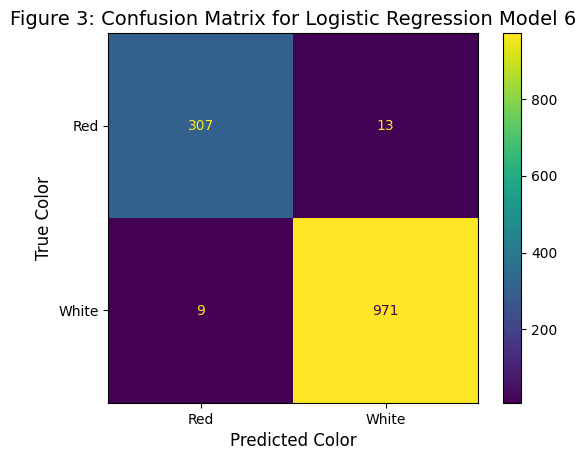

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_list[5], display_labels = ['Red', 'White'])
plt.title("Figure 3: Confusion Matrix for Logistic Regression Model 6", fontsize=14)
plt.xlabel('Predicted Color' ,fontsize=12)
plt.ylabel('True Color' ,fontsize=12)
plt.savefig("CFM6.png", dpi=300) #save to same directory as notebook
plt.show()

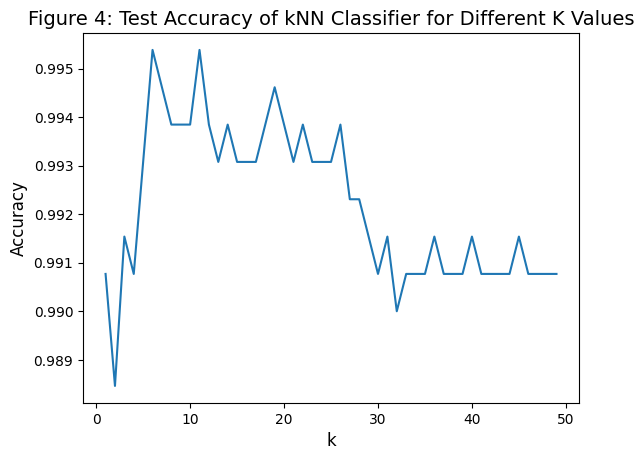

In [ ]:
#kNN Model in official report
scaler = StandardScaler()
x_train_pp = scaler.fit_transform(x_train)
x_test_pp = scaler.transform(x_test)

k_values = np.arange(1, 50)

# Define an empty list to store the accuracy scores for each value of k
accuracy_scores = []

# Test each value of k
for k in k_values:
    # Create a KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn.fit(x_train_pp, y_train)
    
    # Calculate the accuracy score and append it to the list
    accuracy_scores.append(knn.score(x_test_pp, y_test))

# Create a line plot of k vs. accuracy
plt.plot(k_values, accuracy_scores)

# Add axis labels and a title
plt.xlabel('k', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Figure 4: Test Accuracy of kNN Classifier for Different K Values', fontsize=14)

# Show the plot
plt.savefig("Test Accuracy of kNN Classifier.png", dpi=300) #save to same directory as notebook
plt.show()

In [ ]:
print("K's with Highest Accuracy" , np.argwhere(accuracy_scores == np.amax(accuracy_scores))+1)

K's with Highest Accuracy [[ 6]
 [11]]


*analysis about how the number of neighbors has two peaks*

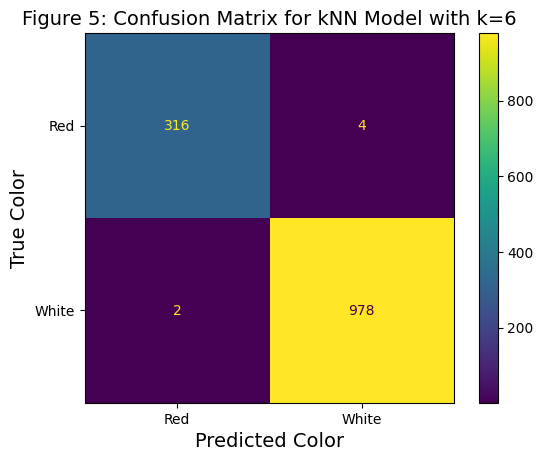

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(x_train_pp, y_train)
ConfusionMatrixDisplay.from_estimator(neigh, x_test_pp, y_test, display_labels = ['Red', 'White'])
plt.title("Figure 5: Confusion Matrix for kNN Model with k=6", fontsize=14)
plt.xlabel('Predicted Color' ,fontsize=14)
plt.ylabel('True Color' ,fontsize=14)
plt.savefig("CFk6.png", dpi=300) #save to same directory as notebook
plt.show()

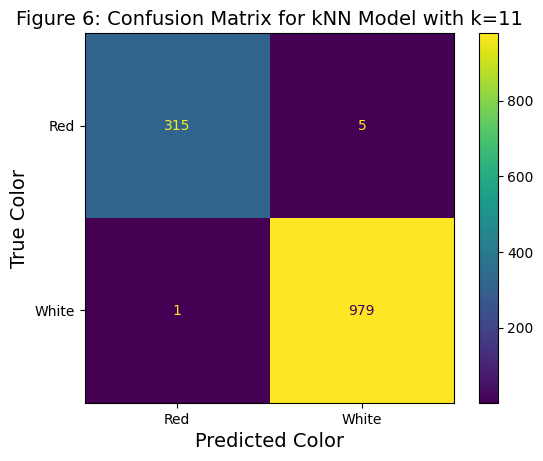

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(x_train_pp, y_train)
ConfusionMatrixDisplay.from_estimator(neigh, x_test_pp, y_test, display_labels = ['Red', 'White'])
plt.title("Figure 6: Confusion Matrix for kNN Model with k=11", fontsize=14)
plt.xlabel('Predicted Color' ,fontsize=14)
plt.ylabel('True Color' ,fontsize=14)
plt.savefig("CFk11.png", dpi=300) #save to same directory as notebook
plt.show()

## Dataset Citation
Citation: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009